### Redes Neurais Artificiais: Perceptron Simples

###### Linear Model

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from imutils import paths
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

In [2]:
pathDog = './dataset/training_set/cachorro'
pathCat = './dataset/training_set/gato'

In [3]:
def processImage (image,size = (32,32)):
    image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    image = cv2.resize(image,(32,32),interpolation  = cv2.INTER_AREA)
    image = image.flatten()
    return image

In [4]:
def load_images(path,size = (32,32)):
    imagePaths = list(paths.list_images(path))
   # imagePaths = imagePaths[0:10]
    images = []
    for (i,imagePath) in enumerate(imagePaths):
        try:
            imagePath = imagePath.replace('\\','/')
            image = cv2.imread(imagePath)
            image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
            image = cv2.resize(image,size,interpolation = cv2.INTER_AREA)
            image  = image.flatten()
            images.append(image)
            
        except:
            print('Imagem Corrompida!!')
    images = np.array(images)
    return images

In [5]:
dataDog = load_images(pathDog)
dataCat = load_images(pathCat)

In [6]:
labelDog = np.zeros(len(dataDog))
labelCat = np.ones(len(dataCat))

In [7]:
(D_train, D_test, dl_train, dl_test) = train_test_split( dataDog, labelDog, test_size=0.20, random_state=42)
(C_train, C_test, cl_train, cl_test) = train_test_split( dataCat, labelCat, test_size=0.20, random_state=42)

In [8]:
X_train = np.concatenate((D_train,C_train))
y_train = np.concatenate((dl_train,cl_train))
X_test = np.concatenate((D_test,C_test))
y_test = np.concatenate((dl_test,cl_test))

In [9]:
percepClass = Perceptron(tol=1e-3, random_state=0)

In [10]:
percepClass.fit(X_train,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
accuracy = percepClass.score(X_test,y_test)
print('Accuracy : %f ' % accuracy)

Accuracy : 0.525000 


#### Testando em uma imagem :

In [12]:
pathT = './dataset/test_set/gato'

In [15]:
pathImages = list(paths.list_images(pathT))
catT = pathImages[10]
catT= catT.replace('\\','/')

In [16]:
img = cv2.imread(catT)

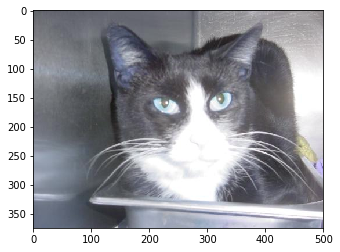

In [17]:
plt.imshow(img)

In [18]:
img = processImage(img)

In [19]:

if percepClass.predict([img])[0] == 1:
    print('Cat')
else :
    print('Dog')

Cat
